## Working with Widgets
Here we create an interactive example, using ipywidgets and matplotlib for plotting, lets first import those. If the script does not run for you try: 

```bash
!pip install -q --upgrade ipympl ipywidgets matplotlib   
!jupyter labextension install jupyter-matplotlib
```

and reload the kernel. 

In [1]:
%matplotlib widget
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np

from basico import *

We start by creating the [lorenz](https://en.wikipedia.org/wiki/Lorenz_system) model, right from the ODEs: 

In [2]:
new_model(name='Lorenz Model')

add_species('X', initial_concentration=0)
add_species('Y', initial_concentration=1)
add_species('Z', initial_concentration=1.05)

add_parameter('beta', initial_value=8./3.)
add_parameter('rho', initial_value=28.)
add_parameter('sigma', initial_value=10.0)

add_equation('d[X]/dt=sigma*([Y]-[X])')
add_equation('d[Y]/dt=rho*[X]-[Y]-[X]*[Z]')
add_equation('d[Z]/dt=[X]*[Y]-beta*[Z]')

Now we use the ipywidgets interact decroator, to allow to modify the values for sigma, rho and beta. 

interactive(children=(FloatSlider(value=10.0, description='sigma', max=50.0, min=1.0, step=0.01), FloatSlider(…

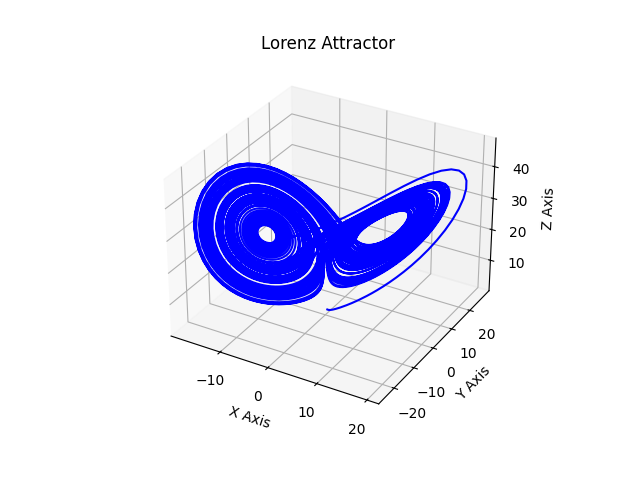

In [3]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

@widgets.interact(sigma=(1, 50, 0.01), rho=(0.1, 50, .01), beta=(-0.1, 10, 0.01), duration=(10, 1000), start_time=(0, 10))
def update(sigma = 10, rho=28, beta=8.0/3.0, duration=100, start_time=0.01):
    # remove existing lines
    [l.remove() for l in ax.lines]

    # set new parameter values
    set_parameters('sigma', initial_value=sigma)
    set_parameters('rho', initial_value=rho)
    set_parameters('beta', initial_value=beta)

    # run time course
    df = run_time_course_with_output(['[X]', '[Y]', '[Z]'], duration=duration, intervals=10000, start_time=start_time)

    # create 3d plot for x,y and z (remember to set color otherwise it'll be overwritten)
    ax.plot(df['[X]'].values, df['[Y]'].values, df['[Z]'].values, color='blue');

I've noticed, that the result is not visible when rendering the result as html, so here a gif showing the result: 

![ipywidget interact with lorenz example](./ipywidget_lorenz.gif)